# PG AI - Advanced Deep Learning and Computer Vision
# Assessement Project: Perform Facial Recognition with Deep Learning in Keras Using CNN

DESCRIPTION

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human face.<br> 
Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising.<br> 
You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.<br>
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.<br>

### Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions.<br>
The faces are in an upright position in frontal view, with a slight left-right rotation.<br>

### Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
### Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

  i. Convolutional Layer<br>
  ii. Pooling Layer<br>
  iii. Fully Connected Layer<br>

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

By Edson Teixeira<br>
teixeiraedson252@gmail.com <br>
November 25th 2021

In [1]:
# data handling
import os
import sys
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from pylab import rcParams
rcParams['figure.figsize']= 12,5
rcParams['xtick.labelsize']= 12
rcParams['ytick.labelsize']= 12
rcParams['axes.labelsize']= 12
# warnings handling 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
import tensorflow as tf

In [2]:
reco = np.load('/ORL_faces.npz')

In [3]:
type(reco)

numpy.lib.npyio.NpzFile

In [4]:
sorted(reco.files)

['testX', 'testY', 'trainX', 'trainY']

In [5]:
reco['trainX']

array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [6]:
reco['trainY']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [7]:
type(reco['trainX']), type(reco['trainY'])

(numpy.ndarray, numpy.ndarray)

In [8]:
reco['trainX'].shape, reco['trainY'].shape

((240, 10304), (240,))

In [9]:
r_rows = 112
r_cols = 92
r_channels = 1

trainX =  np.reshape(reco['trainX'],newshape=(reco['trainX'].shape[0],r_rows,r_cols))
testX =  np.reshape(reco['testX'],newshape=(reco['testX'].shape[0],r_rows,r_cols))

trainX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(trainX))))/255.
testX = np.array(list(map(lambda p: cv2.cvtColor(p, cv2.COLOR_GRAY2BGR), np.float32(testX))))/255.


trainY = reco['trainY']
testY = reco['testY']

In [10]:
trainX.shape, testX.shape

((240, 112, 92, 3), (160, 112, 92, 3))

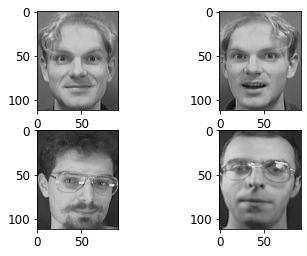

In [11]:
# visualize random images
d = 5
g = np.random.randint(low=0,high=trainX.shape[0]- 2*d,dtype=int)

#plot some faces 
plt.subplot(2,2,1)
plt.imshow(trainX[g])
plt.subplot(2,2,2)
plt.imshow(trainX[g+d])
plt.subplot(2,2,3)
plt.imshow(trainX[g-d])
plt.subplot(2,2,4)
plt.imshow(trainX[g+d*2])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.1
X_train, X_valid, y_train, y_valid = train_test_split(trainX,trainY,random_state=seed,test_size=test_size)

In [13]:
X_train.shape, X_valid.shape

((216, 112, 92, 3), (24, 112, 92, 3))

In [14]:
X_test = testX
y_test = testY
y_train[0]

4

In [15]:
r_rows = 112
r_cols = 92
r_channels = 1

trainX =  np.reshape(reco['trainX'],newshape=(reco['trainX'].shape[0],r_rows,r_cols,r_channels))
testX =  np.reshape(reco['testX'],newshape=(reco['testX'].shape[0],r_rows,r_cols,r_channels))
trainY = reco['trainY']
testY = reco['testY']

In [16]:
s_indices = np.random.permutation(len(trainX))
X_train = trainX[s_indices]
y_train = trainY[s_indices]

In [17]:
X_test = testX
y_test = testY

In [18]:
def conv_model(input_shape,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu',
                        kernel_regularizer=tf.keras.regularizers.L1L2(l1=0.01, l2=0.01)):
    
    input_image = tf.keras.Input(shape=input_shape[1:])
    #Conv2D layer
    Z1 = tf.keras.layers.Conv2D(filters=n_filters,kernel_size=(kernel_size,kernel_size),strides=strides,padding=padding)(input_image)
    ##ReLU activation layer
    A1 = tf.keras.layers.Activation(activation)(Z1)
    ##MAXPOOL
    P1 = tf.keras.layers.MaxPool2D(pool_size=(n_filters,n_filters),strides=strides*8,padding=padding)(A1)
    ##Conv2D
    Z2 = tf.keras.layers.Conv2D(filters=n_filters*2,kernel_size=(int(kernel_size/2),int(kernel_size/2)),strides=strides,padding=padding)(P1)
    ##ReLU
    A2 = tf.keras.layers.Activation(activation)(Z2)
    ##MAXPool
    P2 = tf.keras.layers.MaxPool2D(pool_size=(int(n_filters/2)),strides=strides*4,padding=padding)(A2)
    ##Flatten
    F = tf.keras.layers.Flatten()(P2)
    ##Dense layers
    D1 = tf.keras.layers.Dense(units=units,activation=activation)(F)
    D2 = tf.keras.layers.Dense(units=int(units/2),activation=activation,kernel_regularizer=kernel_regularizer)(D1)
    D3 = tf.keras.layers.Dense(units=int(units/4),activation=activation,kernel_regularizer=kernel_regularizer)(D2)
    ##output layer
    outputs = tf.keras.layers.Dense(units=20,activation='softmax')(D3)
    
    #instantiate the model
    model = tf.keras.Model(inputs=input_image,outputs=outputs)
    return model    

In [19]:
INPUT_SHAPE = (X_train.shape[0],112,92,1)
kernel_regularizer = tf.keras.regularizers.L2(l2=0.05)

#call the convolutional model 
conv_model = conv_model(input_shape=INPUT_SHAPE,n_filters=8,kernel_size=4,strides=1,padding='same',units=1024,activation='relu', kernel_regularizer=kernel_regularizer)
#compile the model
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 112, 92, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 112, 92, 8)        136       
                                                                 
 activation (Activation)     (None, 112, 92, 8)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 12, 16)        528       
                                                                 
 activation_1 (Activation)   (None, 14, 12, 16)        0         
                                                             

In [20]:
class Threshold(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(Threshold, self).__init__()
        self.cl = cl
  
    def epoch (self,epoch,logs=None):
        testScore = logs['val_accuracy']
        trainScore = logs['accuracy']

        if testScore > self.cl:
              self.model.stop_training=True

In [21]:
history = conv_model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),verbose=2, callbacks=[Threshold(0.92)],batch_size=32)

Epoch 1/100
8/8 - 2s - loss: 67.9855 - accuracy: 0.0500 - val_loss: 53.8101 - val_accuracy: 0.1000 - 2s/epoch - 299ms/step
Epoch 2/100
8/8 - 0s - loss: 46.5606 - accuracy: 0.1083 - val_loss: 38.6809 - val_accuracy: 0.1750 - 53ms/epoch - 7ms/step
Epoch 3/100
8/8 - 0s - loss: 35.5629 - accuracy: 0.1625 - val_loss: 31.8760 - val_accuracy: 0.3063 - 50ms/epoch - 6ms/step
Epoch 4/100
8/8 - 0s - loss: 29.8045 - accuracy: 0.3958 - val_loss: 27.3326 - val_accuracy: 0.3688 - 51ms/epoch - 6ms/step
Epoch 5/100
8/8 - 0s - loss: 25.7538 - accuracy: 0.5042 - val_loss: 23.9492 - val_accuracy: 0.5625 - 53ms/epoch - 7ms/step
Epoch 6/100
8/8 - 0s - loss: 22.6752 - accuracy: 0.7208 - val_loss: 21.3500 - val_accuracy: 0.7375 - 52ms/epoch - 7ms/step
Epoch 7/100
8/8 - 0s - loss: 20.3700 - accuracy: 0.7792 - val_loss: 19.4987 - val_accuracy: 0.6812 - 50ms/epoch - 6ms/step
Epoch 8/100
8/8 - 0s - loss: 18.5839 - accuracy: 0.8542 - val_loss: 17.8968 - val_accuracy: 0.8562 - 52ms/epoch - 7ms/step
Epoch 9/100
8/8 

In [22]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,67.985519,0.050000,53.810127,0.10000
1,46.560551,0.108333,38.680946,0.17500
2,35.562904,0.162500,31.875996,0.30625
3,29.804464,0.395833,27.332561,0.36875
4,25.753807,0.504167,23.949188,0.56250


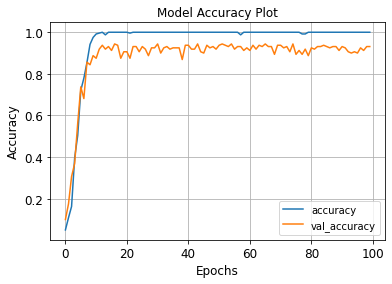

In [23]:
results[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

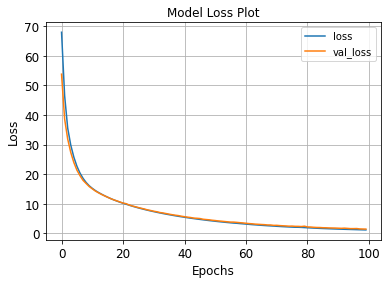

In [24]:
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()